In [11]:
import requests
import csv
import os

#############################---Exercise 1 Start---####################################

dta = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data").text
headers = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']

def write_csv(dta, headers):

    data = dta.split('\n')

    with open('exercise1.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        for row in data:
            floatList = row.split(',')
            writer.writerow(floatList)
            #writer.writerow(row)

write_csv(dta, headers)

######################################################################################

{'vertices': [[0.0709002, -0.0656619, -0.114306], [0.0658428, -0.0666212, -0.119161], [0.0658428, -0.0659822, -0.114306], [0.0709002, -0.0663117, -0.119244], [0.0607965, -0.0670644, -0.119043], [0.0709002, -0.0663117, -0.109367], [0.0759642, -0.0661366, -0.119291], [0.0658428, -0.0684953, -0.123686], [0.0607965, -0.0664411, -0.114306], [0.0658428, -0.0666212, -0.10945], [0.0759642, -0.0661366, -0.10932], [0.0759642, -0.0654802, -0.114306], [0.0709002, -0.0682181, -0.123846], [0.0557644, -0.0670383, -0.114306], [0.0607965, -0.0688928, -0.123457], [0.0658428, -0.0684953, -0.104926], [0.0709002, -0.0682181, -0.104766], [0.0810312, -0.0660959, -0.119302], [0.0759642, -0.068061, -0.123937], [0.0658428, -0.0714767, -0.127572], [0.0557644, -0.0676416, -0.118888], [0.0607965, -0.0670644, -0.109569], [0.0607965, -0.0718012, -0.127247], [0.0557644, -0.0694101, -0.123158], [0.0607965, -0.0688928, -0.105155], [0.0810312, -0.0660959, -0.10931], [0.0759642, -0.068061, -0.104675], [0.0810312, -0.0654

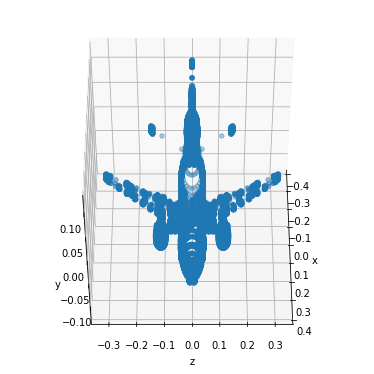

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import requests
import json


def plot_point_cloud(verts):
    verts = np.array(verts)
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig, azim=0, elev=50)
    ax.scatter3D(
        verts[:, 0],
        verts[:, 2],
        verts[:, 1]
    )
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_zlabel('y')
    
    plt.show()


# Returns a dictionary from a 3D object
def getDicFromObj():
    pointcloud = {}

    obj = requests.get("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/plane.obj")
    data = obj.text.splitlines()

    vertices = []
    faces = []
    for row in data:

        tempRow = row.split()

        if tempRow[0] == 'v':  # vertices
            floatList = [float(i) for i in tempRow[1:]]
            vertices.append(floatList)

        elif tempRow[0] == 'f':  # faces
            if '/' in row:
                intList = []
                for i in range(1, len(tempRow)):
                    item = tempRow[i]
                    slashIndex = item.find('/')
                    newItem = item[:slashIndex]
                    intList.append(int(newItem))
            else:
                intList = [int(i) for i in tempRow[1:]]
            faces.append(intList)

    pointcloud["vertices"] = vertices
    pointcloud["faces"] = faces

    return pointcloud


pointcloud = getDicFromObj()
print(pointcloud)
plot_point_cloud(pointcloud["vertices"])

#######################################################################################

In [13]:
#############################---Exercise 3 Start---####################################
class Car:
    def __init__(self, color, model, year, maxSpeed, mileage, currSpeed):
        self.color = color
        self.model = model
        self.year = year
        self.maxSpeed = maxSpeed
        self.mileage = mileage
        self.currSpeed = currSpeed

    # x = Miles/hour to increase the current speed
    def accelerate(self, x):

        originalSpeed = self.currSpeed

        if self.currSpeed + x > self.maxSpeed:
            self.currSpeed = self.maxSpeed
        else:
            self.currSpeed += x

        newSpeed = self.currSpeed

        if originalSpeed != newSpeed:
            print("Current speed is now: " + str(self.currSpeed))

    # Decrease current speed by 20%
    def brake(self, x):

        originalSpeed = self.currSpeed

        self.currSpeed = self.currSpeed - x
        if self.currSpeed < 0:
            self.currSpeed = 0

        newSpeed = self.currSpeed

        if originalSpeed != newSpeed:
            print("Current speed is now: " + str(self.currSpeed))


''' Initialize my favorite car '''
stingray = Car('Pearl', "Corvette Stringray", 2021, 194, 15, 0)

''' 
    Begin “driving” at 0 mph. Increase the speed by increments of 10 until 
    the maximum speed is reached (but do not exceed the maximum speed).
'''

X = 10 # <-- That will be the constant for these programs haha

while stingray.currSpeed != stingray.maxSpeed:
    stingray.accelerate(X)

while stingray.currSpeed != 0:
    stingray.brake(X)


#######################################################################################


Current speed is now: 10
Current speed is now: 20
Current speed is now: 30
Current speed is now: 40
Current speed is now: 50
Current speed is now: 60
Current speed is now: 70
Current speed is now: 80
Current speed is now: 90
Current speed is now: 100
Current speed is now: 110
Current speed is now: 120
Current speed is now: 130
Current speed is now: 140
Current speed is now: 150
Current speed is now: 160
Current speed is now: 170
Current speed is now: 180
Current speed is now: 190
Current speed is now: 194
Current speed is now: 184
Current speed is now: 174
Current speed is now: 164
Current speed is now: 154
Current speed is now: 144
Current speed is now: 134
Current speed is now: 124
Current speed is now: 114
Current speed is now: 104
Current speed is now: 94
Current speed is now: 84
Current speed is now: 74
Current speed is now: 64
Current speed is now: 54
Current speed is now: 44
Current speed is now: 34
Current speed is now: 24
Current speed is now: 14
Current speed is now: 4
Curren